In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ahmed\Downloads\supermarket_sales -.csv")
df.head(10)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [3]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [4]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

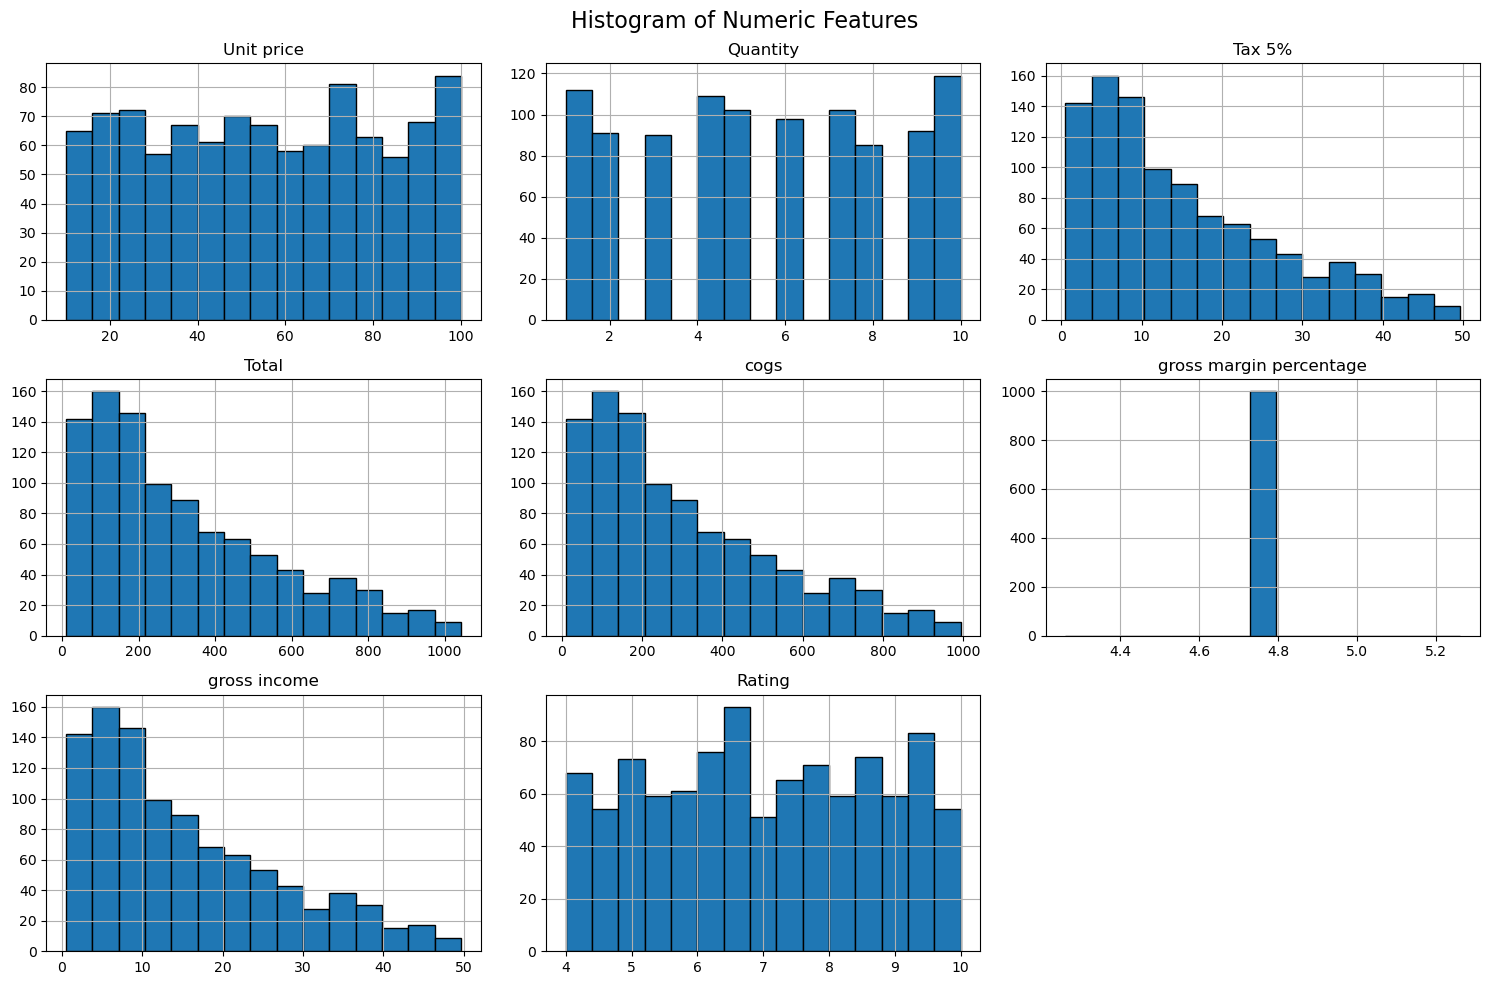

In [5]:
df[numeric_cols].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histogram of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

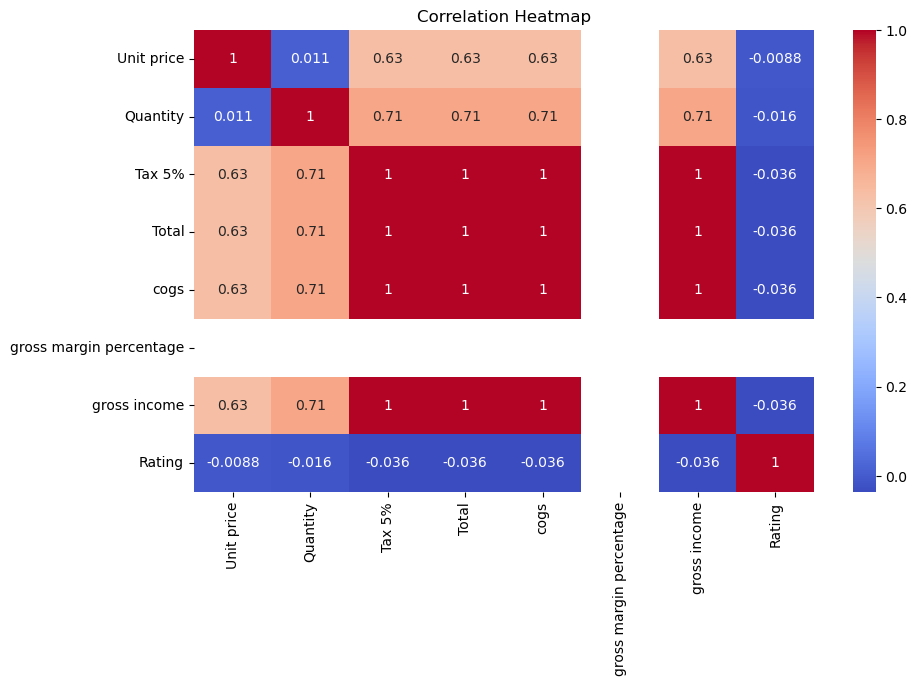

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

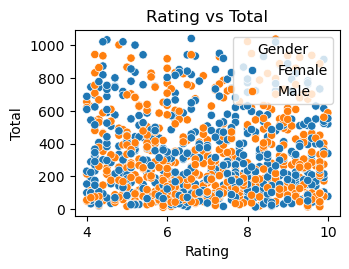

In [7]:
plt.subplot(2, 2, 4)
sns.scatterplot(x='Rating', y='Total', data=df, hue='Gender')
plt.title('Rating vs Total')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


df_encoded = pd.get_dummies(df, columns=['Gender', 'Product line', 'Payment', 'City', 'Customer type', 'Branch'], drop_first=True)


features = ['Unit price', 'Quantity', 'gross income', 'Rating']
X = df_encoded[features]
y = df_encoded['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Simple Linear Regression:
R²: 0.4563487815095947
MSE: 35369.40807016888


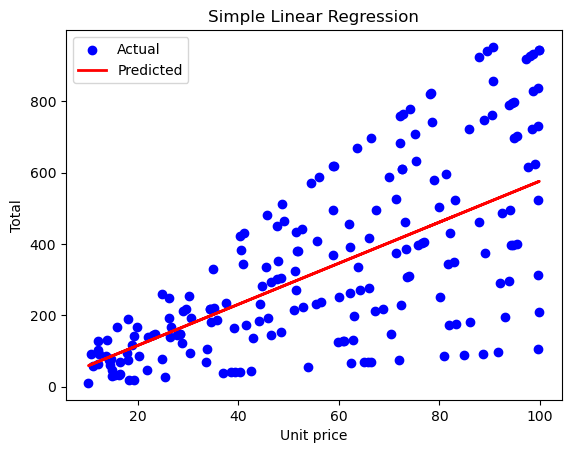

In [9]:
X_simple = X_train[['Unit price']]
X_test_simple = X_test[['Unit price']]

model_simple = LinearRegression()
model_simple.fit(X_simple, y_train)
y_pred_simple = model_simple.predict(X_test_simple)


print("Simple Linear Regression:")
print("R²:", r2_score(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))


plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Unit price')
plt.ylabel('Total')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [10]:
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

print("Multiple Linear Regression:")
print("R²:", r2_score(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))


Multiple Linear Regression:
R²: 1.0
MSE: 3.585860330268925e-26


Polynomial Regression (degree=2):
R²: 0.45585875706871803
MSE: 35401.2885733743


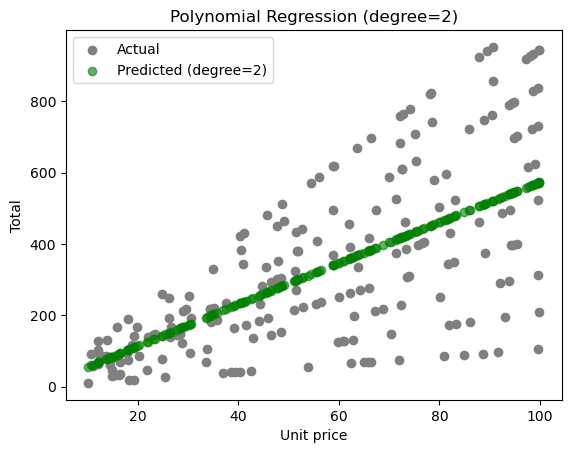

Polynomial Regression (degree=3):
R²: 0.45252237645187265
MSE: 35618.35018107618


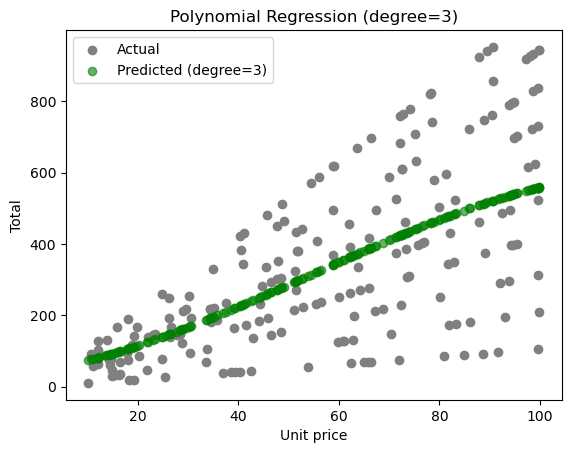

Polynomial Regression (degree=4):
R²: 0.4497770034340651
MSE: 35796.961421645625


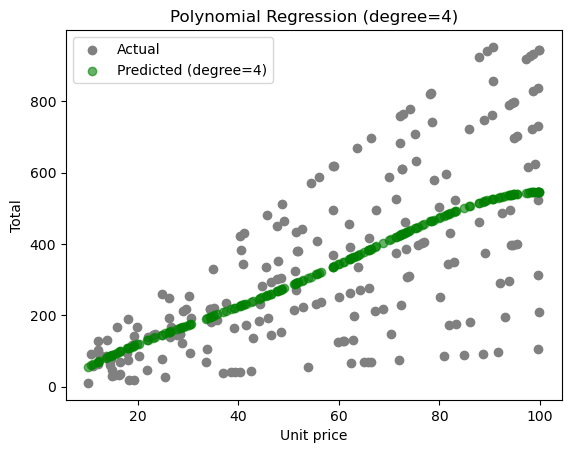

In [11]:
for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_simple)
    X_poly_test = poly.transform(X_test_simple)

    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    y_pred_poly = model_poly.predict(X_poly_test)

    print(f"Polynomial Regression (degree={degree}):")
    print("R²:", r2_score(y_test, y_pred_poly))
    print("MSE:", mean_squared_error(y_test, y_pred_poly))

    
    plt.scatter(X_test_simple, y_test, color='gray', label='Actual')
    plt.scatter(X_test_simple, y_pred_poly, color='green', label=f'Predicted (degree={degree})', alpha=0.6)
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.xlabel('Unit price')
    plt.ylabel('Total')
    plt.legend()
    plt.show()


              precision    recall  f1-score   support

           0       0.59      1.00      0.74       118
           1       0.00      0.00      0.00        82

    accuracy                           0.59       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.35      0.59      0.44       200



c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


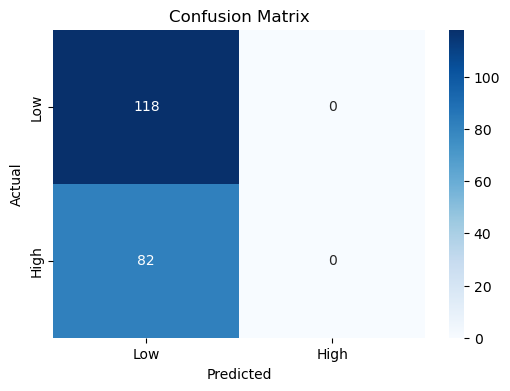

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


df_encoded['Rating_Class'] = (df_encoded['Rating'] >= 7.5).astype(int)

X_class = df_encoded[['Total', 'gross income', 'Unit price', 'Quantity']]
y_class = df_encoded['Rating_Class']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)


log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train_c)
y_pred_class = log_model.predict(X_test_scaled)


print(classification_report(y_test_c, y_pred_class))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_class), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
